# Homework 2: Pandas and simple visualization

Дані для домашнього завдання були взяті з Kaggle, по [посиланню](https://www.kaggle.com/aungpyaeap/supermarket-sales) ви зможете знайти їх опис. 

*   Invoice id: Computer generated sales slip invoice identification number

*   Branch: Branch of supercenter (3 branches are available identified by A, B and C).

*   City: Location of supercenters

*   Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

*   Gender: Gender type of customer

*   Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

*   Unit price: Price of each product in $

*   Quantity: Number of products purchased by customer

*   Tax: 5% tax fee for customer buying

*   Total: Total price including tax

*   Date: Date of purchase (Record available from January 2019 to March 2019)

*   Time: Purchase time (10am to 9pm)

*   Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

*   COGS: Cost of goods sold

*   Gross margin percentage: Gross margin percentage

*   Gross income: Gross income

*   Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

Для тих хто використовує Google Colab, не забудьте перед початком роботи загрузити файл supermarket_sales.csv або скористайтесь одним з методів наведених в [статті](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)

1. Використовуючи  Pandas прочитайте набір даних в DataFrame з файлу  'supermarket_sales.csv'.

In [2]:
import pandas as pd
print(pd.__version__)
url = 'https://raw.githubusercontent.com/dmytrovelychko/rd_ds_python/main/supermarket_sales.csv'
df = pd.read_csv(url)

1.5.3


2. Відобразіть 5 перших записів і 5 останніх записів

In [127]:
df[:5] # or df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [51]:
df[-5:] # or df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


3. Виведіть назви колонок разом з їх типами даних

In [52]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

4. Скільки колонок мають текстовий тип даних? А скільки колонок мають числовий тип даних (float/int)? Відповідь треба дати за допомогою функцій бібіліотеки Pandas. Формат відповіді: тип - кількість колонок. Також, відповідь вважатиметься правильною, якщо для типів float і int будуть окермі стрічки у відповіді (тобто обʼєднувати їх необовʼязково).

In [53]:
df.dtypes.value_counts()

object     9
float64    7
int64      1
dtype: int64

5. Яку кількість покупок зробили чоловіки, а яку жінки?
Спробуйте отримати відповідь за допомогою методу value_counts(), а також методу groupby()

In [54]:
# expect 1 row representing 1 unique purchase 
print(df["Gender"].value_counts())
print(df.groupby("Gender")["Gender"].count())

Female    501
Male      499
Name: Gender, dtype: int64
Gender
Female    501
Male      499
Name: Gender, dtype: int64


6. Які існують унікальні продуктові лінії? (Product line)

In [55]:
df["Product line"].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

7. Яка середня ціна товару (Unit price) для кожної продуктової лінії (Product line)?
Hint: отримати відповідь можна за допомогою лиш однієї стрічки коду =)

In [56]:
df.groupby("Product line")["Unit price"].mean()

Product line
Electronic accessories    53.551588
Fashion accessories       57.153652
Food and beverages        56.008851
Health and beauty         54.854474
Home and lifestyle        55.316937
Sports and travel         56.993253
Name: Unit price, dtype: float64

8. Перетворіть колонку Date в формат datetime.

In [57]:
# Dataset has corresponding date and time colomns, so for proper interpretation of values it is important to know:
# - time standart of values
# - use the same time standart for any relative opeartion and conversion
# I am assuming all values are in UTC 
from datetime import datetime as dt
df["Date"] = pd.to_datetime(df["Date"]) # or df['Date'] = df['Date'].apply(lambda x: dt.strptime(x, '%m/%d/%Y'))
df["Date"]

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

9. За допомогою команди plot() побудуйте лінійний графік суми всіх покупок за кожен день. Нехай лінія буде зеленого кольору :) Не забудьте підписати вісі і дати графіку назву (title). Oберіть комфортніший для вас спосіб: чи то за допомогою методів pandas, чи за допомогою Matplotlib. Або навіть обома!
Для виконання даного завдання необхідно просумувати колонку Total для кожного дня 

In [58]:
import matplotlib
print(matplotlib.__version__)
plt = matplotlib.pyplot
%matplotlib inline

3.7.1


(array([17897., 17911., 17928., 17942., 17956., 17970., 17987.]),
 [Text(17897.0, 0, '2019-01-01'),
  Text(17911.0, 0, '2019-01-15'),
  Text(17928.0, 0, '2019-02-01'),
  Text(17942.0, 0, '2019-02-15'),
  Text(17956.0, 0, '2019-03-01'),
  Text(17970.0, 0, '2019-03-15'),
  Text(17987.0, 0, '2019-04-01')])

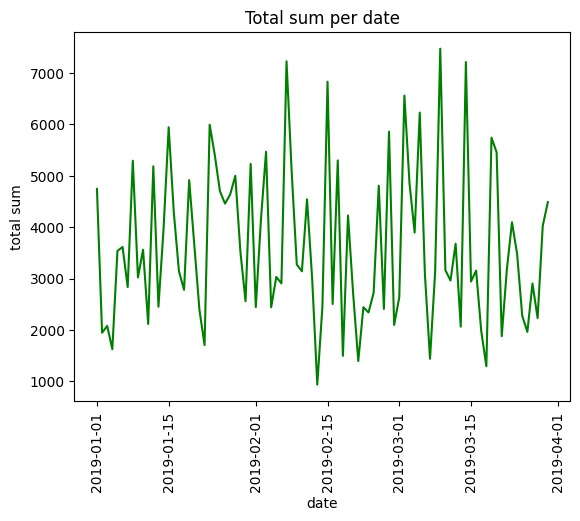

In [59]:
plt.plot(df.groupby(["Date"])["Total"].sum(), "-g")
plt.title("Total sum per date")
plt.ylabel("total sum")
plt.xlabel("date")
plt.xticks(rotation=90)

<Axes: title={'center': 'Total sum per date'}, xlabel='Date', ylabel='total sum'>

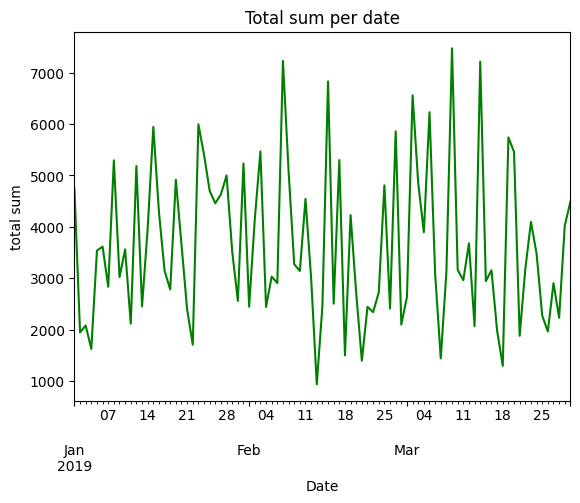

In [60]:
total_sum_by_date = df.groupby(["Date"])["Total"].sum()
total_sum_by_date.plot(title="Total sum per date", ylabel="total sum", color="green")

10. А тепер побудуйте графік кількості подобових продажів в кожному філіалі (Branch). Вкажіть розмір фігури (10, 6). На одному графіку має відображатись лінія для кожного філіалу. Лінії мають бути різного кольору. Кількість продажів можна порахувати як кількість унікальних Invoice ID.

Один зі способів виконання завдання є створення наступної структури даних:
1. зробити індексом дату
2. колонки - це назви філіалів
3. Значення кількість продажів в конкретну дану в конкретному філіалу
4. Зробити таку транформацію можна за допомогою функції `pivot_table()`
5. Таку таблицю можна легко відобразити на графіку за допомогою функції `DataFrame.plot()`  


<Axes: title={'center': 'Purchase count by date per branch'}, xlabel='Date', ylabel='purchase count'>

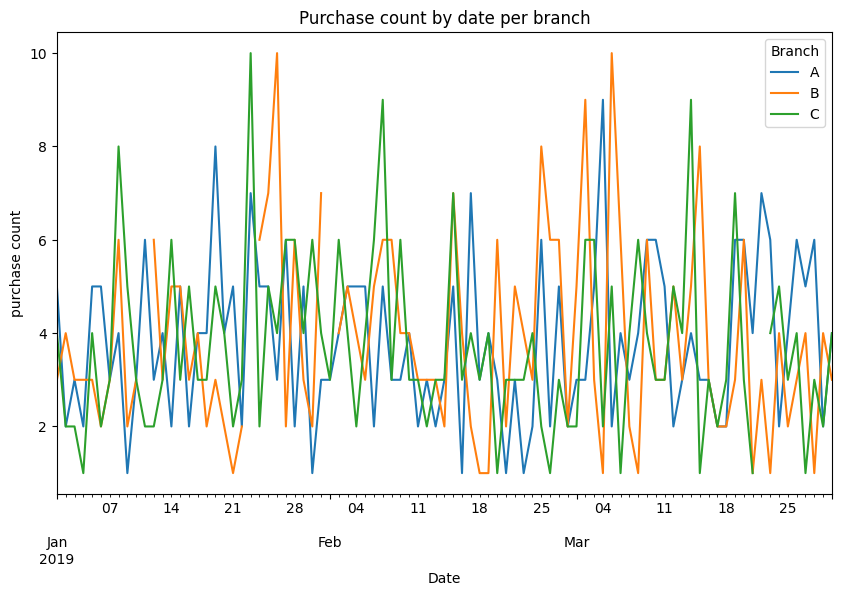

In [61]:
import numpy as np
branch_sales_per_date = df.pivot_table(values="Invoice ID", index=["Date"], columns=["Branch"], aggfunc=np.count_nonzero)
branch_sales_per_date.plot(figsize=(10, 6), ylabel="purchase count", title="Purchase count by date per branch")

Воу-воу, якось тяжко зрозуміти щось на такому графіку. Давайте спробуємо інакше. Покажіть кількість продажів для кодного філіала на окремому графіку.
Досить просто зробити це, вказавши `subplots=True` в функції `plot()`.  
Задайте розмір фігури (10,10).

array([<Axes: xlabel='Date', ylabel='purchase count'>,
       <Axes: xlabel='Date', ylabel='purchase count'>,
       <Axes: xlabel='Date', ylabel='purchase count'>], dtype=object)

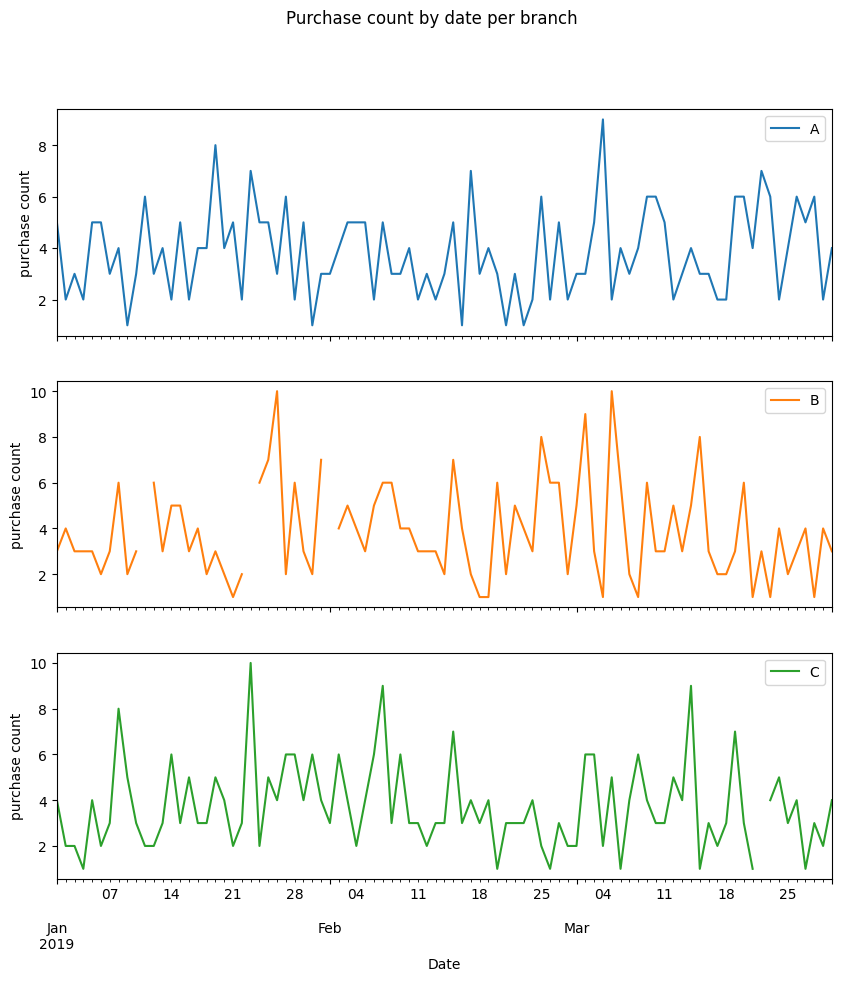

In [62]:
branch_sales_per_date.plot(figsize=(10, 10), ylabel="purchase count", title="Purchase count by date per branch", subplots=True)

<font color='blue'>**[Optional]**</font> Давайте зробимо графіки ще зручнішими для сприйняття. Хочеться їх трохи згладити. Одним з методів згладування є ковзне середнє (Moving Average - MA). Суть методу полягає в тому, що значення кожної точки дорівнює середньому значенню N попередніх точок. Це один з найпростіших методів згладжування набору статистичних даних і має кілька варіацій. [Тут](https://www.youtube.com/watch?v=7Rz_ITRIADg) непогано відео на тему. 
 
Для того, щоб порахувати ковзне середнє можемо використати функцію [pandas.DataFrame.rolling](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html).     

Используя параметры window=10 и min_periods=1 выведите сглаженные подневные графики количества продаж по филиалам. 

array([<Axes: xlabel='Date', ylabel='purchase count'>,
       <Axes: xlabel='Date', ylabel='purchase count'>,
       <Axes: xlabel='Date', ylabel='purchase count'>], dtype=object)

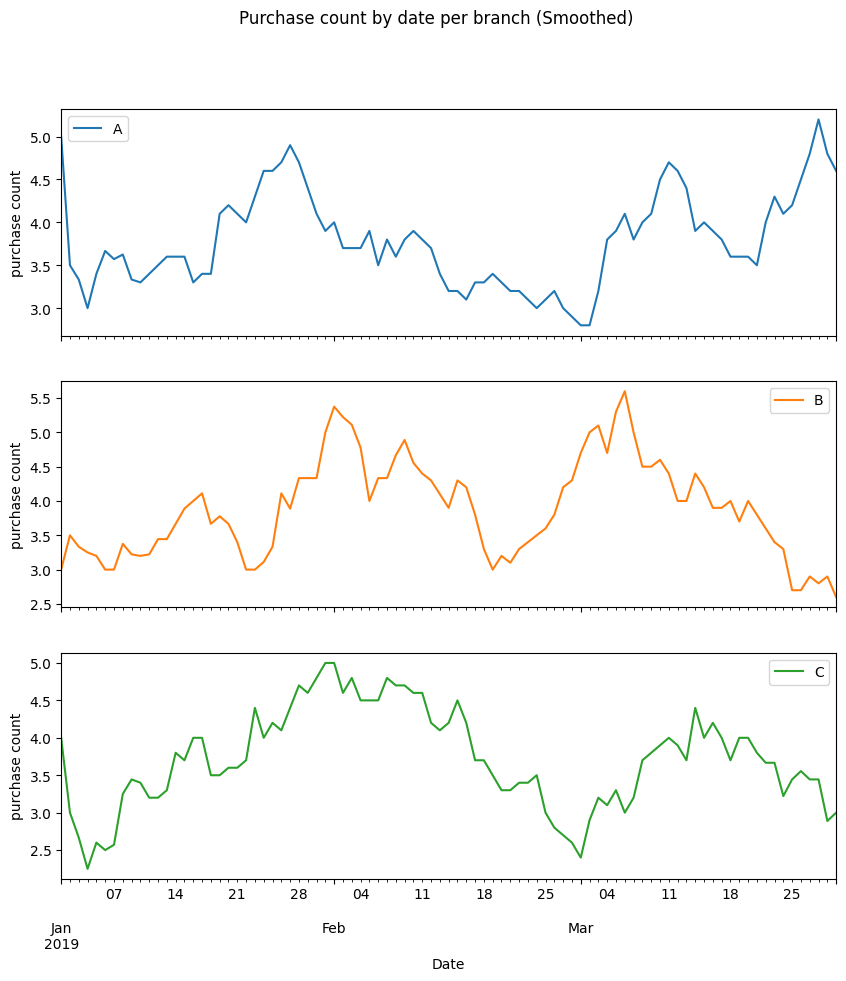

In [63]:
rolling = branch_sales_per_date.rolling(10, min_periods=1).mean()
rolling.plot(figsize=(10, 10), ylabel="purchase count", title="Purchase count by date per branch (Smoothed)", subplots=True)

11. В якому місті знаходиться кожен з філіалів?

In [64]:
# I don't know relation between city and branch. Let's investigate
df.groupby("Branch")["City"].nunique()
# It is 1-to-1 so:
print(f"A branch located in {df[df['Branch'] == 'A']['City'].unique()} city")
print(f"B branch located in {df[df['Branch'] == 'B']['City'].unique()} city")
print(f"C branch located in {df[df['Branch'] == 'C']['City'].unique()} city")

A branch located in ['Yangon'] city
B branch located in ['Mandalay'] city
C branch located in ['Naypyitaw'] city


12. В яких містах покупці частіше розраховуються готівкоюй (`Cash`), а в яких - електронним гаманцем (`Ewallet`)?  
Для виконання цього завдання можна сформувати таблицю, де стрічки будуть відповідати способам оплати (`Payment`), в стовпці - `City`, значення - кількість покупок (вони ж -  продажі).

Цікавить саме відсоткове співвідношення покупок зроблених різними способами =)


<Axes: title={'center': 'Percentage of payment type by city'}, xlabel='City', ylabel='% in single city'>

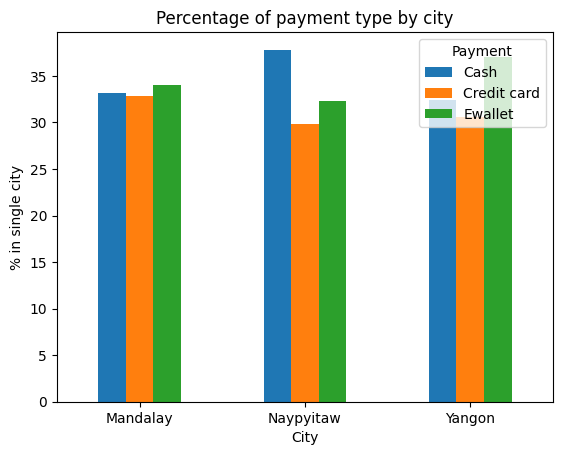

In [65]:
payments_per_city = df.pivot_table(values="Invoice ID", index=["Payment"], columns=["City"], aggfunc=np.count_nonzero)
payments_per_city_ratio = payments_per_city/payments_per_city.sum()*100
payments_per_city_ratio.T.plot.bar(rot=0, ylabel="% in single city", title="Percentage of payment type by city")
# stacked bars visually is not comparable, left side by side bars for comparison
# Cash - Naypyitaw
# Ewallet - Mandalay, Yangon

<font color='blue'>**[Optional]**</font> 13. Давайте тепер проаналізуємо розподіл цін на товари в різних продуктових лінійках. Наша ціль - знайти відповідь на питання: в якій продуктовій лінійці найбільше дорогих товарів (90-100 у.о.)?

Для початку побудуємо візуалізацію і зробимо це кількома способами. Подумайте, яка є більш інформативною для вас і яку би ви використали для роботи.


  13.1.  На одній фігурі відобразіть гістограму розподілу цін на товари для кожної продуктової лінійкию Тобто на одній фігурі кількість гістограм рівна кількості продуктових лінійок.

array([[<Axes: title={'center': 'Electronic accessories'}>,
        <Axes: title={'center': 'Fashion accessories'}>],
       [<Axes: title={'center': 'Food and beverages'}>,
        <Axes: title={'center': 'Health and beauty'}>],
       [<Axes: title={'center': 'Home and lifestyle'}>,
        <Axes: title={'center': 'Sports and travel'}>]], dtype=object)

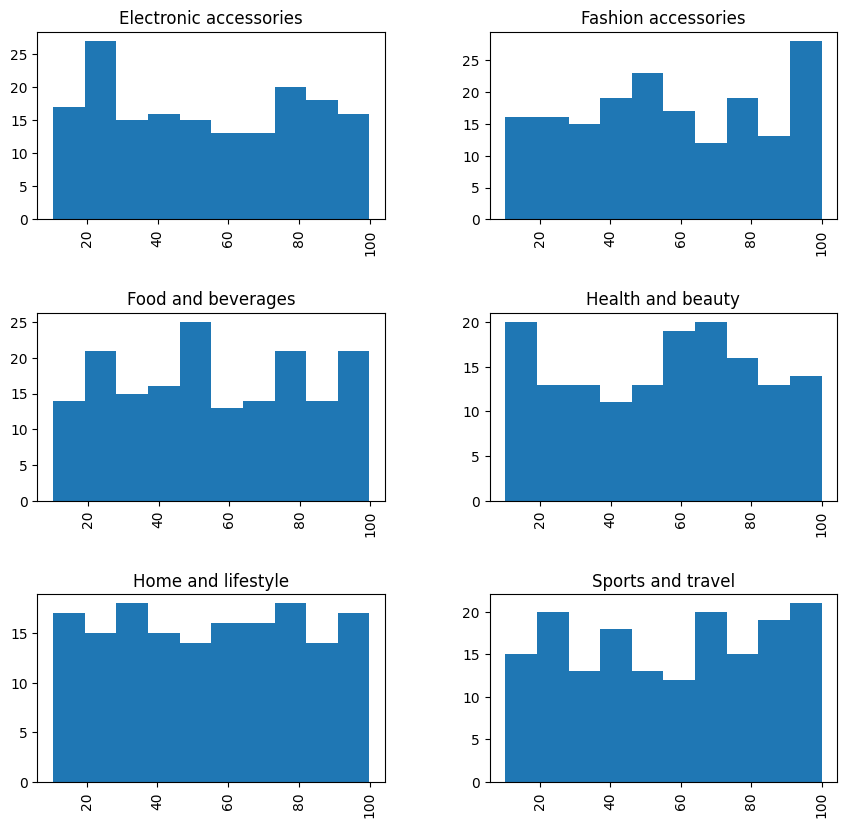

In [66]:
df.hist(by="Product line", bins=10, column="Unit price", figsize=(10,10))

13.2. А тепер відобразіть гістограми з однаковою кількість бінів на одному графікую Для зручності використовуйте прозорість alpha не більше 0.4 і переконайтесь, що гістограми різного кольору. Не забудьте про легенду, заголовок. 

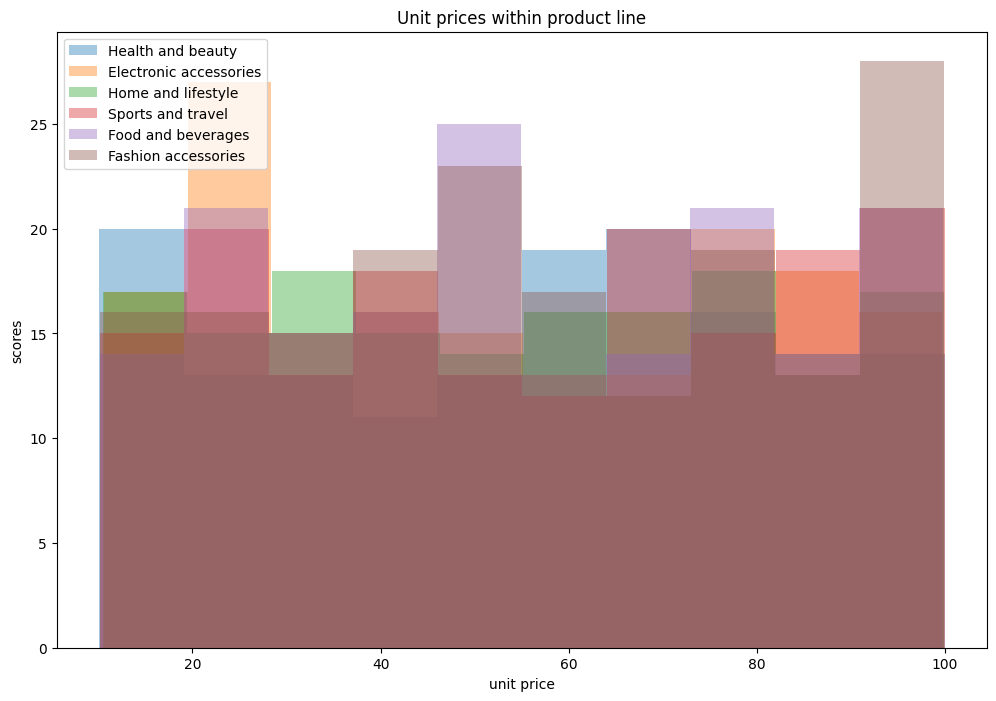

In [67]:
plt.figure(figsize=(12,8))
for product_line in df["Product line"].unique():
  plt.hist(df[df["Product line"] == product_line]["Unit price"], bins=10, alpha=0.4, label=product_line)
plt.legend(loc='upper left')
plt.title('Unit prices within product line')
plt.ylabel('scores')
plt.xlabel('unit price')
plt.show()

То яка візуалізація виявилась для вас зручнішою і чому?

Overlapping histograms visualy give answer for target question, but overlap can cause a problem if multiple product lines have near the same score. To eliminate this issue we can doulbe check potential answer in separated histograms

13.3. А тепер знайдіть відповідь на питання за допомогою функцій numpy і pandas.

In [73]:
product_line_expensivness =df[df["Unit price"] >= 90].groupby("Product line")["Unit price"].count()
print(product_line_expensivness)
print(f"Product line with biggest amount of products with prices higher than 90 {product_line_expensivness.idxmax()}")

Product line
Electronic accessories    18
Fashion accessories       29
Food and beverages        22
Health and beauty         15
Home and lifestyle        18
Sports and travel         25
Name: Unit price, dtype: int64
Product line with most products with prices higher than 90 Fashion accessories
